# CDS 503: Machine Learning

***
## Lab 5_Supplementary Materials (AUC-ROC Curve)
### AUC-ROC Curve in Machine Learning 

The **Receiver Operator Characteristic (ROC)** curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The **Area Under the Curve (AUC)** is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the **ROC** curve.

The higher the **AUC**, the better the performance of the model at distinguishing between the positive and negative classes.

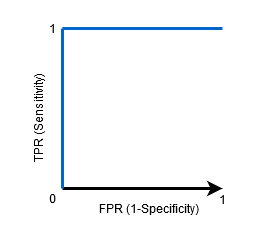

In [15]:
from IPython import display
from base64 import b64decode
base64_data = "iVBORw0KGgoAAAANSUhEUgAAAQUAAADhCAYAAADBNKCxAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAAkISURBVHhe7d0xbhtJFoBhRc58CiXO9wLKdAjnAyieAygWsOdYwamuoHQvMAYUzgF8Ai2eVs+oV+4SOWKzXRS/DyiY7BYp0ur+Xd0i6YtngIYoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAIUoAMWHi8L9/f3z5eXl6zXgn/pQUYggXFxciAIc4MNE4fr6+iUGZgpwmLM9fLh9+Pv54o//GsZvGbH9zeosoxA/kKt//7X4wzKMLYYobGifKCz9kAxjyyEKG/qnUQAqUQAKUQCKDxeFfYgCjIkCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUEwXhcfHx+eLi4tfRixfiyjA2DRRyBhcX1+/Lqli+VpxEAUYmyYKoxj09v26t4gCjE13+PDWbGEtogBjU55o7M8rPD09va5ZhyjA2JRRaEUQ2kA4pwDHNWUU8qRijMvLy9el/xfLDiUKMDblOYWbm5vXa8chCjA2ZRSWrDFDSKIAY9NEIXb6t8aav5EQBRg7mZnCmkQBxqaLwhZEAcamOnzof/3Yj7WIAoyZKQDFdFGIGUH/2oS1iQKMTTlTiCi0hw1rvxdCFGDsJA4f7u/vnVOAjZzETCGGD1mBbUx5TiHG2u+MbIkCjJ3E4cPaRAHGpolCzg5yprA01iIKMGamABRTnlNYYqYA25gmCu1hwtLwLknYxsnMFNYkCjA2XRS2IAowNtXhg98+wO9npgAUogAUogAU00UhPt49P08h3x0ZY833QogCjE0XhfaEYsYgxpofvCIKMDZdFGLnjwjELCFfsJS/lViLKMDYdFFo/3PZiEFej0isRRRgbLoobEEUYEwUgGK6KLS/cejHWkQBxqaLQuz8a54/WCIKMDZlFI5NFGBsuijc3d29vIDpmEQBxqacKYzGWkQBxqaLwhZEAcZEASimjEL+D1H5foe4HK9uXIsowNh0UYj3O8SJxnh5c0YhTj56QxRsY7oo5AnFNgrBiUbYxnRRyM9TaKMQQfAR77CN6aIQ+pc6x+HDmkQBxqaMwrGJAoyJAlBME4X8MJV8iXN+2lKONYkCjE0ThTiR2J47iJOM+W7JCIUTjbCNaaLQzgZy1tBac7YgCjA2ZRRixtDODHxwK2xnmii0hw/toUOIw4c817AGUYCxaaIQYjYQo50l9NfXIAowNlUUtiIKMDbV4cM+1pg1iAKMTROF/nUKvYhBrI+vO5QowNh0hw+jj3hfIwZJFGDMOQWgEAWgEAWgEAWgOJkoONEI25gmCu1bpdvPZgy5fC2iAGPTRCFCkO99yPc65K8nvcwZtjNNFNqZQDtrWPP/e0iiAGNTRiEcKwhBFGBs6igciyjAmCgAxVRR2DXWIgowNk0UtiQKMCYKQDFNFNpfQ8ZoP6NxbaIAY9NEof2w1gzEsYgCjE0ThT4C8SrGNd/v0BIFGBMFoBAFoJgqCrvGWkQBxqaJwpZEAcamPXw4JlGAMVEAClEAiqmisGusRRRgzEwBKEQBKEQBKKaJwpZEAcZEAShEAShEAShEAShEAShEAShEAShEAShEAShEAShEAShEAShEAShEAShEAShEAShEAShEAd7h+/fvzz9+/Hi99rGIArzT1dXV8+3t7YeLgyjAOz08PLx84PDnz58/VBxEAQ4Qs4UIQ4xPnz59iDiIAhwgZwvtOPWZgyjAgb58+fJLGE45DqIAB1qaLbTj1OJw9lFY+iEaxjHGqcThLKNw+/D389Wf/3m++Ncfiz88wzjmmD0OZxmFED+UpR+YYRxrmCnAmXBOASj89gH4yesUgMIrGid3eXn58wf09PT0uhSOw3sfJndzc/Mywt3d3Usg4JgOeZfk/f39tNvoh4lCFPvx8fH12q/XYU2HfJ5CBCG2T1E4ojhU6A8Z4i88/vJhJtfX1z+3TVE4opgRiAKnRBSOzEyBUyMKG+jPIfTXYSaisIE4VvPbB06FKGwkZgc52kMJmI0oAIUosJc8YdqP2IDC0ro8ZApL62O8NWuKQ60YrX032P77HEv+veQ5ojhUjOtfv34ty5e0t43x1uOM9XHf504UJpIb8GgnXtoBYudto5GXU0RjtKHH9+nXxe3jfnZFIda3MYnLb+1wa3rv99kVhbAUyXMjChN5TxRip8+NONb3UXhrR4jbtl8fgcjIvBWF0ePM75/rMxS5vJXLYyzdT46Q95fPJce3b99+Lk/t+rB023huMfJ28dj6Gdc5E4WJ5Abc7yQpN+5Wuywu9zvfWzOF0ca/Kwoh7nPp+4V8Hvl9c4fM5xX3nSGL27ePI9blfcbXxONvd+yQl/vlu26bjyPX52NYimPe5zkShYnkBtyOdofu18XIDTssrY+xJDb60Y4fO8iuKITcoXPkjtXvrCGeRzzWdsdMuTMvrYv76u8vL492+NTftv2auJx/t/1zbYNxjpa3GH6L3IDjzyW5cY/E+n7HzOu9uJ99oxD/ksZ9xYjLS3KHiz+XnkcfhX6MghHy/mJ9yMvt8n1u239NXI71bXhDPJbR8zwHojCR3IDjzyW5cY/E+jYCcXl0f7Fs3yj0Yn2/I4W4TazL59E+1lwXy0b33e+0qb+/vNwu3+e2/dfEjh+jnxXE9X7ZORGFieQGHH8uyY17JNbHjteKnXdpBw7tDtLaFYXQf6+4nI89n0f+a5s7Yz6vDETIdfm82suxY8bX5v31XzNaHpZuGyMup3zMeZsUf1/9snMiChPJDTh3nt7SBtyK9e2OGvI+l/7li522//oQy3ZFIcT9tiMfd37PuP9c1z/uXB6jfQx52xztsryPvNwv3/e27bql55nrz5UonLHYKUaziEPkjhh/zixilLOZdO6HDkEUztwxdoJTiEIEoX+MMZvYZ4b00YkCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgCUIgC0Hh+/h/08Y0X+bOUUgAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))

When **AUC = 1**, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

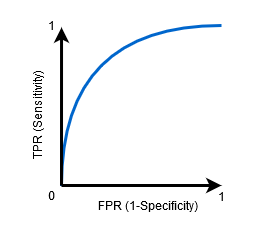

In [16]:
from IPython import display
from base64 import b64decode
base64_data = "iVBORw0KGgoAAAANSUhEUgAAAP0AAADmCAYAAAAeJIOkAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAABNFSURBVHhe7d0PjFXVnQdwEMQ/xNomzW7NJk3KJBs2tU36J2m6qQk1dWez6UqjSdepyTat21YEi2ul24wiWDUVbBfdAN2A1VorI61UxT8rimXXgVagwvBvmP/o/GNwgJkB5i8znn3fy/ndOe9y77w3M/e9d+49309ywnvnvL/D/d5z7n33njtDEZFTGHoixzD0RI5h6Ikcw9ATOYahJ3IMQ0/kGIaeyDEMPZFjGHoixzD0RI5h6Ikcw9ATOYahJ3IMQ0/kGIaeyDEMPZFjGHoixzD0RI5h6Ikcw9ATOSZVoa+qqlJlZWX6HhGFSU3oEfgZM2Yw9EQ5pCL05eXlXtjZ0xPlxuE9UYixD5VqPTWs3mk5p/6wr0f9audJtXbHCfXzN7rUQ68eV/e91KF+9Ps2tXjT++q2p99Tt/7qmLrpl03qn/6rUV3/n/Xq71fVqc89WKv+bsVh9anKQ+qaZQfUR5fuV5cv3qcefKVTv0tpMPTknO6z59WBtgH1P4f71BPV3eqnmRDe/tv31Y3rmtQXHz7qBXTG9/9SsLJia4f+JKXhZOh7enr0LUqj0/2jakf9GfX4WyfUv/+uTf3Lhhb1ldV1al6mx0VPGxbEYhaGPkb5hv6+++7TtyjpGk8MqS2Z4ff9meH2N9Y3qXn3HgoN2lQKenz0/BgBYAiPoTyG9BjaY4iPoT6G/BgtPLv7lPc5Xj3Uq946ekbtajqr9rX2q9rOQdXSPaQ6e0cyK6PzanAks91QYs6FHr38lVdeqZqamnQNJcHgyJjafaxfbXi7Wy2palXXZXruqzPbyGFhzVU+dleN+vTKI+qGNQ3q208dU5UvdGTC+4G37Y5teGzLY5s+rZwL/fLly72f9hYvXqxryEZv1vapR17vUhUbW7yAhoU3qsy5491MD12rvvv0MfXoti6vF95Rd0Y1ZEYF54bG9Du4K1WhzwW9/Ny5c73QozQ3N+sWKrX6riFvqLxwXaOae2f+292fuOeAKn+8US17vk09885JdbB9QL8iRXEq9NLLS2FvXzoDw2Nq64FedWdmqD7//sOhgQ4W9Pjo+TECeC2z7dzeM6xfjSbDmdAHe3kp7O2LZ39rv1q97bj6h8ca1MwfhAdbClYE2HbHNjy25bFNT/FwJvTBXl4Ke/vCOXVuVD2397S35/uTPzkYGm4pGNIvXNfk7VDDUJ8Kx4nQR/XyUtjbx2tzJuhfX9sYGm6zfP6hWvXjLW3eTjsqHidCH9XLS2FvP33YgYadadixFhZwlI/fXeNtkz+566RqOz2in0nFlvrQ5+rlpbS0tOhnUL5GM5vZT/3ppPrqL+pDQ46CI+FWvtzhHaxCdkh96HP18lKWLFmin0G54ACWxZta1Ud+GH5wzLzKg96hps3d3Ltuo1SHHr387NmzQ0MeVtjbR+sbGPV+R//Sz46GBh3lmxua1csHevUzyFapDn1YLz9r1qyL6qSwt7/YH+vOqO/8+j016/bwoH/mgSNq9bYudbyP2+hJkdrQB7flb7rpJrVr1y7vuHup27lzp1qwYIF/H4W9/QXYBsdPaGFBxwoAKwKsECh5Uht66eVvvvlmL+zCDH1/f79Xt3fvXlVRUeHVud7b17QNqG890RIadgztMcTHUJ+SK5WhRy8fDLsIC73Ys2ePuuWWW5zs7XGK6veeeT807P/2m/e8nXeUDqkMfWdn9HREE4VeuBR6nOe99LnW0LBXbGz2en5Kl1TvyAuTT+hd0Dc4pipfaA/dQbdwfVNmm549e1o5F/orrrjCD/3AgHu92PnRD9XDrx0P/Y39a2sa1Bs8JDb1GHqHrNneFTrp45cfOaperOHv665g6B1wqGNQXR9yqOxnf3rEm1WG3MLQp9xj209cFPayew9556mTmxj6lGrpHlb/HHJ6K7bnyW0MfQptrO6+aJ45HFjD39oJGPoUOXHmvKoIOZoOP80RCYY+JTbtPqX+6kc1WWG/duVh9RaPj6cAhj7hMI87DpM1w46ydHOrfgRRNoY+wTCFdPAyTp+qPOjVE0Vh6BMKV24xw46CHp9XcKFcGPoEWvZ8e1bY//qeA6pqz2ndSjQxhj5h/vXJY1mB/8fHG7299kT5YugTondg1Au4GXisAIgmi6FPAFxt9XMP1mYFHkN8oqlwLvSXX365H/rBwUFda6+dTefU3/w4+5JQ2IlHNFUMvcW27OtRs29/Nyvwv/kzz4qj6WHoLfXL/+vOCvvVS/er1w9zgguaPobeQitf7swK/N8uP6z2tyb3mAKyC0NvmTs2Zc9Ii2vBdfTwQhIUH4beIsEe/ub/bvYuEkkUJ4beEuv/94OswF/7wBHdQhQvht4C2EtvBh49PFGhMPQlVt14NutnuesereeQngqKoS8hHGlnHniDvfTcaUeFxtCXCI6lNw+t/ehdNfxZjorCqtBXV1f7gTQL6uNiS+iDJ8/wwBsqFitCL2EvLy/XNdlQH1f4bQh98PRYHlpLxWRF6KPCHpTv4yZS6tAHJ8DgyTNUbFYN7xHEOII9kcsuu8wP/dDQkK4tjuAUVzw9lkrBuh15we365uZ4f7MuVegxWaUZeE6AQaViXehNCLy5Aohjm74UocdkleastdiJR1Qq1oVedtqhlJWV6doLUDddpQi9OS89LkjBOe2olKzbpl+0aJG+VxjFDj2uPCOBR8F9olKyLvRhouqnopihR49uXmoKPT5RqVkReglhVIlzj34xQ1+xcfxikrjyDC9EQTZIRE8fp2KFHpeLlsCjvFTTo1uISsuq0BdDMULf0j2cdX14XkySbGLN8D7481ywxKUYob9xXZMf+GtXcjIMsgt7+pg9tv2EH3iU7Ud5Ig3ZxarQI4jB3+bjVsjQH+oYyAp85QsduoXIHtb19Ai9hBIl7mPxCxn6639R7wf+Sz87qmuJ7GL98L6qqsoLaFwKFfo127NPpvlz81ndQmQX63t6lDgn0ShE6M+PfqiuWXbAD/zDrx3XLUT2sW6bHiXuM+tMc+bM8d9neHhY104PQi6BL7v3kK4lspP1w/u4xR16zHX3kR/u90O/4e1u3UJkJytCL727hDGsxCXu0GMPvQT+s7xABSUAe/pp6OwdUbNuvxB4lGd5Bh0lgHXb9GGi6qciztDj8FoJ/Jcf4U90lAxWhF5CGFXi/K0+rtA3fjDkBx7lRZ5QQwmRiJ4+TnGF3pwN52tr6nUtkf2sCn0xxBH6mrbsw23frD2jW4jsZ83wPkl77ys2Zj6rDvzCdU26ligZ2NNP0q6ms1m9PO4TJQlDP0kL14+fK/+tJ1p0LVFyMPST8Me6M1m9PLbtiZLGqtBj+ms5n17OrkOJ81j86YT+O78e32PPmW0pqawKPYIoJOwocU6sMdXQ9w2MZh19907LOd1ClCxWhR7hRsjRy8sBObJXPy5TDf3aHePTYHGCDEoyq0JvXrwSYZf7WAnE5dJLL/XfY2RkRNfmhqBL6LECIEoqq0JfDFMJPYbyEngM8THUJ0oqhj4PizeNn1iDnXlESWZV6M099sESl8mGfnRMZU2SgZ/tiJLMqtAjiHFuv4eZbOif+tNJP/Cf4SQZlALWhb7QJhv6rxrTWq/e1qVriZLLqtCvWrWq4Nenn0zoD7Znn013vC+/fQBENrOup48qcZlM6Jc93+YH/psbCjdDL1ExWRX6YphM6D9xz/hc9i8f6NW1RMnG0EfYvPe0H/h5lQd1LVHyWRd6ucKNHG+P2zg6Ly75hv7raxv90K/YygtRUnpYFXocb48deTj8VkKPnXtxnnCTT+hPnRv1A4/S3D358+6JbGVV6BFEMEMPUh+HfEL/nDG0/8rqOl1LlA5WhV7OpzdDj3DGOQV2PqG/7enx8+YfeKVT1xKlg1Whh+ChuBjexymf0H/yJwf90HMOPEob60JfaLNnz/ZDf/78eV07bn9rvx/4j99do2uJ0oOhD1i9bfyy0xUbOfElpY8VoZfJMuQQXJktR0qccoX+hjUNfuif3MXLTlP6WBF67Kgzt92xE0/OtsOKIM4deROFfmB4TM38wYXAo7Sdjv4dnyiprAi92ZtLr28K3p+OiUL/Uk2PH/jPP1Sra4nSxbrQo8c3e/a4J8acKPR3Pjc+Q85/bGnXtUTpYkXozeG9ObQHDO9lWz8OE4V+/v2H/dC/Wduna4nSxYrQgwTR7OWD9+MQFfr6rvHrzc+9c5+uJUofa0JfLFGhX7vjAz/031jPK9FSelkzvM9HHL1+VOhxyWkJPee1pzSzIvTB3+mDEHa043HTFRV6DOkl9BjqE6WVVcP7qCmw4wi7CAs9dtpJ4LEzjyjNuE2f8cjrXX7ol1S1enVEacXQZ+AYewn9hrd56C2lm3OhnzVrlh/60dEL16T79Mojfuh3H+v36ojSyvnQD46M+YFHwX2iNEtE6OPckRcMvXlFWvT4RGlnRejNU2nNufFA6uMSDD224SX0PH+eXGBF6BF0OfZejrWXn+/iPgw3GHrsrZfQYy8+UdpZEXoEUJi9fpzz3Ytg6K9bXeeH/rVDvIoNpZ91oYdCBR6Cob966fi159t7OL89pZ+1oS8UM/R1neOTYOK6dUQucDr0v//LST/05Y836EcQpZs1oc9V4mKGfvmL45eixmWpiVxgReiLyQz9wrX1fuifeeekfgRRujkd+nmV49efP9g+oB9BlG5WhN78mQ7FnCMvbmboZ3xvjxf4OXe8q1uJ0s+K0JuTYcoKoFDCQv/FhzndNbnDitAHQ46j8OI83t4UFvrvPn1MtxKln3Ohv+SSSy4K/aPbePgtuYOhz4T+2d2ndCtR+lkT+lwlLmGh31F3RrcSpZ8VoS+msNA3nODst+QOK4f3hRQW+nNDnC2H3OF86D92V41uIXKD86HnFFnkGmtCn6vEJRj6G9bw7Dpyi/M9/bef4oE55BbHQ79XVb7QoVuI3OB86HGJaiKXWBH6YgqG/g/7enQLkRucDz0udkHkEudD33qKM+CSW5wP/diHuoHIEc6FfubMmX7or7mHR+ORe5wOPWfMIRc5Hfob1zXqWiJ3OB362zhNFjnI6dDf8SxDT+5xOvR3/65V1xK5w+nQ3/tiu64lcodzoZfAozz4SqeuJXKH06H/+Ruc+prc43To1+44oWuJ3OF06J+o7ta1RO5wOvS8yAW5yOnQb+G59OQgp0P/6qFeXUvkDqdD/9ZRXs6KJq+hoUH19fXpe8njdOh3NZ3VtUSTs2DBArVixYpEht/p0O9rHdC1RJOzdetWbxm66qqrEhd+p0Nf2zmoa4kmD729LEtz5sxJTPidDn1LN69WS1Mnvb1ZktDzOx36zt4RXUs0NfPnz89apqTYHH6nQ3+6/7yuJZqasN7eLDaG3+nQs7AUq9gUfvdC/4XvqxnXfCH0P4aFpdDFhvA7F3rAHz3sP4SFpVCFPT1RSnCbnsgx3HtP5BD+Tk/kGB6RV2JlZWX+f0Bzc7OuJSoMHntfYosWLfIKrFq1ylsBEBXSdM6yq6qqKukymorQY41bXV2t7118nyhO0zmfHoHH8snQTwOG8sEhPf6g+OMS2aS8vNxfNhn6aUCPztBTkjD008SenpKGoY9BcBs+eJ/IJgx9DLCtxL33lBQMfUzQu0sxh/pEtmHoiRzD0JNHdkgGCxYQCGuTTRoIa0eZaNSDTSEUU74LZPB9CkX+LrKPBptyuH/rrbdm1Ycxn4sy0edEO17bBQy9JWQBjQpp2AKOcJorBbktsFKIWpDxPsE2PB+vkyv0aDdXFrg9UaDiNNX3yRV6CFsJphFDb4mphB6hloUU7cHQT7Sg47nm47ECkJXIRKGP+pzy/tIuKwKpN0k9StjrSAF5PfkuUjZv3uzXC7Mdwp6L74Yiz8NnC46Y0o6ht4QsoMEQCFl4TWYdbgfDNVFPH7Vw5wo94DXD3g/ke8j7SuDke+G1ZUWF55ufA23ymngMPr8ZXJDbwfpcz5XPIe3yGcJWfvKaacXQW0IWULOYgQ22ociCC2HtKGGwUEcFGwHIFXqQwEqR4ATDCPge+Kxm8ISENawNrxV8PbkdFWgRfK75GNyWv23wu5orhLQKXyqo6GQBxb9hZOGNgvZg8OR+EF4n39CjJ8RroeB2GAkU/g37HsHQB0vUCgHk9dAOctusz+e5wcfgNtrNFSvgs0R9z7Rg6C0hCyj+DSMLbxS0myHH7ajXQ12+oQ9CezAogOegTb6H+VmlDXVRrx0MpQi+ntw26/N5bvAxCDZKsFfH/WBd2jD0lpAFFP+GkYU3CtoRLBPCGRZQMANgyhV6CL4Xbstnl+8hvaWETb6XrABA2uR7mbcRPDxWXi/4mKh6CHsuCm4L+czyHIG/V7AubRh6S8gCKuEICltATWg3gwjymmE9F0IZfDygLlfoAa9rFvnc8p54fWkLfm6pRzE/gzxXilknryG3g/X5PtdsC/ue0p5mDL2jsNBHjQKmQ4KGf22GlY2MRoQLQ3tg6B1WiIU8CaFH4IOfEaOBfEY4acDQEzmGoSdyDENP5BiGnsgxDD2RYxh6Iscw9ESOYeiJHMPQEzmGoSdyDENP5BiGnsgxDD2RYxh6Iscw9ESOYeiJHMPQEzmGoSdyilL/D87/0x118KQzAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data))

When **0.5<AUC<1**, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

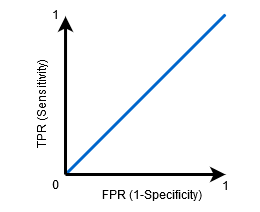

In [3]:
from IPython import display
from base64 import b64decode
base64_data = "iVBORw0KGgoAAAANSUhEUgAAAQQAAADUCAYAAAB6QV2RAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAAxaSURBVHhe7d3LbhNPGoZxIOEs7mGkbFjMDcwuu+xhA2I/UgSXAGKdCxlFbLmFwAbmChBBmsWg2SEWnA8eXtNf/4tKt922q9tfVT0/qYTdHTs26XooO7Y5NwOABkEA0CIIAFoEAUCLIABoEQQALYIAoEUQALQIAoAWQQDQKjoIx8fHs729veYcgGWKDYJicO7cOYIArKDIIBwcHMxDwAoBWA0PGYAt+t/7r80pHwgCsCWH//rP7Nw//z17/PS/zZbtIwi/vHv3rjkFTMNiYMPLSoEg/PLw4cPmFDC+OAY670X1QdDq4Nq1a7PXr183W4DxeI6BVB+ER48ezX89ef/+/WYLMA7vMZCig7CMVgfXr1+fB0Hj9PS02QOklUMMpOog2OrABqsEjCGXGEi1QYhXBzZYJSClnGIg1QYhXh3YYJWAVHKLgVQZhL7VgQ1WCdhUjjGQKoPQtzqwwSoBm8g1BlJdEJatDmy8efOmuQQwXM4xkOqCsGx1YOPBgwfNJYBhco+BVBUErQ52d3c7A9A1WCVgqBJiIFUFoWt1sLOzc2abDVYJGKKUGEg1QYifO7h169bs+fPn8/cx2LZnz57N9vf32/MarBKwSEkxkGqCYKuD27dvz0NgwiB8+PBhvu3ly5ezu3fvzrexSkCf0mIgVQRBq4M4BKYrCObFixezO3fusErAGSXGQKoIwtu3b5tTZy0KgiEICJUaA6nqScUuQ4IAmJJjINUH4erVq20QPn782GwFzio9BkIQCAIGqCEGQhAIApaoJQZCEAgCFqgpBkIQCAJ61BYDIQgEAR1qjIEQBIKASK0xEIJAEBCoOQZCEAgCGrXHQAgCQcAvxOA3gkAQqkcM/kIQCELViMGfCAJBqBYxOIsgEIQqEYNuBIEgVIcY9Ks+CFeuXGmD8OnTp2YrSkUMFiMIBKEaxGA5gkAQqkAMhiEIBKF4xGA4gkAQikYMVkMQCEKxiMHqCAJBKBIxWA9BIAjFIQbrIwgEoSjEYDMEgSAUgxhsjiAQhCIQgzRcB+Hk5KSdrOHQ9lQIQv6IQToug2AhODg4aLb8SdtThYEg5I0YpOUyCH0hiA39ukUIQr6IQXquHzJokqaY9Itcvny5DcLnz5+brfCOGIzD/ZOK8fMIp6enzZ40CEJ+iMF43AchpBiEcUjxHAJByAsxGJf7INgTiBp7e3vN1t+0bVMEIR/EYHzun0M4PDxszo2DIOSBGEzDfRC69G1fB0HwjxhMx2UQbIL2jZS/eSAIvhGDaWW5QkiJIPhFDKbnOghTIAg+EYPtcPuQIf4VYzxSIQj+EIPtYYVAEFwhBtvlOgiapPFrD1IjCH4Qg+1zv0JQEGzCaqR+bwNB8IEY+JDdQ4bj4+P55E2FIGwfMfAjuxWCRsoPSCEI20UMfHH/HIJG6nc4hi5dutR+ny9fvjRbMQVi4E92DxlSIwjbQQx8chkEWxXYRO0aqRCE6REDv1ghEIRJEQPf3D+H0KVv+zoIwnSIgX8ug2ATtG+kfC0CQZgGMchDliuElAjC+IhBPlwHYQoEYVzEIC9uHzLwW4b8EYP8sEIgCKMgBnkiCAQhOWKQL4JAEJIiBnlzHQR9BLt9HoK9y1Ej5XsbCEI6xCB/roOgSWosBBopPzSFIKRBDMrgOgia+AqAVgf2YiT77UMqBGFzxKAcroMQ/kevCoGdVyBSuXjxYvs9vn792mzFUMSgLK6DMAWCsD5iUB6CQBDWQgzK5DoI4W8W4pEKQVgdMSiX6yBokqZ8vqALQVgNMSib+yCMjSAMRwzK5zoIR0dH8xcnjYkgDEMM6uB+hdA3UiEIyxGDergOwhQIwmLEoC4EgSD0Igb1cR8E+5+b7P0LOq1XLaZCELoRgzq5DoLev6AnFfWSZQuCnmhM+eYmgnAWMaiX6yBokkoYBLHtKRCEPxGDurkOgn0eQhgETdyUH8NOEP5CDOA6CBK/fFkPGVIiCL8RA4j7IIxtd3e3DcK3b9+arXUhBjAEofIgEAOEXAbBPgjFXrZsn5JkI6Wag0AMEHMZBD1pGD5XoCcU7V2PikTKJxVrDQIxQBeXQQhXAbZaCMXnN1FjEIgB+rgPglYK4Yog9Yes1hYEYoBFXAYhfMgQPlwQPWSw5xZSqCkIxADLuAyC2CQNVwfx+RRqCQIxwBBugzCVGoJADDCU24cMQ6RYLZQeBGKAVbgMQvw6hJhCoP36uk2VHARigFW5fsjQ9zHsKUJgSg0CMcA6eA6hwCAQA6yLIBQWBGKATVQfhJ2dnTYI379/b7bmiRhgUwShkCAQA6SQZRBSPqlYQhCIAVJxGYTw7c7hZymKbU8l9yAQA6TkMgiKgL2Xwd67YL+CTP3S5ZyDQAyQmssgaHKacLWQ8v9jMLkGgRhgDO6DIGPFQHIMAjHAWLIJwlhyCwIxwJgIQkZBIAYYm9sgLBup5BIEYoApuAzClHIIAjHAVAiC8yAQA0zJZRDCXzVqhJ+pmJrnIBADTM1lEMIPVrU4jMVrEIgBtsFlEOIA6NWJKd+/EPIYBGKAbak+CBcuXGiD8OPHj2br9hADbBNBcBQEYoBtcxuEZSMVL0EgBvDAZRCm5CEIxABeZPGQYUzbDgIxgCcEYYtBIAbwhiBsKQjEAB65DcKykco2gkAM4BUrhImDQAzgGUGYMAjEAN4RhImCQAyQA5dBmNIUQSAGyAVBGDkIxAA5IQgjBoEYIDcEYaQgEAPkqPognD9/vg3Cz58/m62bIQbIFUFIHARigJwRhIRBIAbIHUFIFARigBIQhARBIAYoBUHYMAjEACUhCBsEgRigNARhzSAQA5SIIKwRBGKAUhGEFYNADFAygrBCEIgBSkcQBgaBGKAGBGFAEIgBakEQlgSBGKAmBGFBEIgBhnj16tXs/fv3zbm8VR8Ei4FGiBhgFfv7+7PHjx9nHwaC0BEEYoBVPX36dH4M3bhxI+swEIQoCMQA69IqwY6lS5cuZRkGghAEgRhgE7ZKCEduKwaCEP4AiQE2dPPmzT+PqWbkEgaCEP7giAE21LVKCIf3MBCEjh8agzH28BqG6oOgH8rf/v6Pzh8agzH28BaG6oMg+oF0/bAYjLEGKwSgAjyHAKDFbxkAzPE6BAAtXqno2N7eXvvDOT09bbYC4+C9DI4dHh7OhxwdHc3jAIxpk3c7Hh8fuzlGiwyCSn1yctKcO3seSGmTz0NQDHR8EoSR6OFB/DBBf9n6iwc8OTg4aI9NgjASrQQIAnJCEEbECgG5IQgji58ziM8DnhCEkemxGb9lQC4IwgS0KrARPnwAvCEIAFoEAUvZk6Px0MEjXfvsYZJ07ddYtFrSwyuN0NCDNf4+Y7G/F3tOSA8Pdf7evXt/bO8SXlZj0e3Ufl13bQiCU3bw9k3groNfEzcMhp02CkbfQa7vE+/T5XU9y4Kg/WFIdHrRZEtp3e+zLAjSFcjSEQSn1gmCJrwdwNofB2HRJNBlw69XHCwwi4LQdzvt+9t+i4RtD9l2ja7rsSF2fXZfbDx58qTdbsL90nVZ3TcNu5xuW7zSqglBcMoO3niCGDuwQ+E2nY4n3qIVQt+BvywIouvs+n5i98O+r01Gu1+6bouYLh/eDu2z69TX6PaHk1rsdLx92WXtdth+uw1dYbTrrAFBcMoO3nCEkznep2EHtXTt1+iiA75v0mtyLAuC2GS2YZMqnqii+6HbGk5KYxO5a5+uK74+O9032U182fBrdNr+buP7GsaiBt1HCLbODl792cUO7D7aH09KOx/T9QwNgv4F1XVp6HQXm2z6s+t+xEGIR18sxK5P+8VOh9uHXDb+Gp3W/jC6otvSdz9LRBCcsoNXf3axA7uP9ocB0Om+69O2oUGIaX88iUSX0T67H+FttX3a1nfd8YQ18fXZ6XD7kMvGX6NJrxGvBnQ+3lYyguCUHbz6s4sd2H20X5MupInbNXklnByhZUGQ+HvptN12ux/2r6xNRLtfFgexfXa/wtOalPpau774a/q2S9dlNXTa2G22yxj9fcXbSkYQnLKD1yZOrOvgDWl/OEnFrrPrXzxN2PjrRduWBUF0veGw223fU9dv++Lbbds1wttgl7URbrPrsNPx9qGXDfd13U/bXwuCgDlNiL7VwyZsEupPzxQiW8WY2h4uCEFAa4wJkEMQFIP4NmoVMWRlVBqCAKBFEAC0CAKAFkEA0CIIAFoEAUCLIABoEQQALYIAoEUQALQIAoDGbPZ/VIZQLfjDib8AAAAASUVORK5CYII="
display.Image(b64decode(base64_data))

When **AUC=0.5**, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn import metrics
import warnings # to hide unnecesary warning
warnings.filterwarnings('ignore')                                                            
%matplotlib inline
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#import NB classifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
#import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#import svm classifier
from sklearn.svm import SVC

#import roc-auc 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
train = pd.read_csv("adult_train_modified.csv")
test = pd.read_csv("adult_test_modified.csv")
train.shape

(30162, 15)

In [6]:
# select all columns except the last one (the target label)
x_train=train.iloc[:,:-1]
# set target categorical data label (15th attribute)
y_train=train.iloc[:,14]

# select all columns except the last one (the target label)
x_test=test.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y_test=test.iloc[:,14]

In [7]:
print('-------- x axis test ----------')
print(x_test)
print('-------- x axis train ---------')
print(x_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
       age  workclass  fnlwgt  education  education-num  marital-status  \
0        8          2    8315          1              6               4   
1       21          2    1754         11              8               2   
2       11          1   10750          7             11               2   
3       27          2    4780         15              9               2   
4       17          2    7091          0              5               4   
...    ...        ...     ...        ...            ...             ...   
15055   16          2    8927          9             12               4   
15056   22          2    7893          9             12               0   
15057   21          2   11193          9             12               2   
15058   27          2    1593          9             12               0   
15059   18          3    6062          9             12               2   

       occupation  relationship  race  sex  capital-gain  capital-l

In [20]:
y_train.value_counts()

0    22654
1     7508
Name: Class, dtype: int64

In [21]:
y_train.shape

(30162,)

### Decision Tree

In [19]:
# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 0, criterion = 'entropy').fit(x_train, y_train)

# predict the classes of new, unseen data
predict_dtree = dtree.predict(x_test)
score = metrics.accuracy_score(y_test,predict_dtree)
score
predict_dtree.shape

(15060,)

### Naive Bayes

In [18]:
# Instantiate the classifier
gnb = GaussianNB()

# Train classifier
gnb.fit(x_train,y_train)

# Test the classifier
predict_nb = gnb.predict(x_test)
score = metrics.accuracy_score(y_test,predict_nb)
score
predict_nb.shape

(15060,)

### K-Nearest Neighbor

In [10]:
#Define k-value
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train)

#Estimate the accuracy of the classifier on test data
predict_knn=knn.predict(x_test)
score = metrics.accuracy_score(y_test,predict_knn)
score

0.7895086321381142

### Support Vector Machine

In [23]:
svcGrid= SVC(random_state = 0, C=50, kernel='rbf', gamma = 0.005)
svcGrid.fit(x_train, y_train)

predict_svm = svcGrid.predict(x_test)
score = metrics.accuracy_score(y_test,predict_svm)
score

0.7213147410358566

### ROC Curve

In [12]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, predict_dtree, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predict_nb, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, predict_knn, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, predict_svm, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [13]:
# auc scores
auc_score1 = roc_auc_score(y_test, predict_dtree)
auc_score2 = roc_auc_score(y_test, predict_nb)
auc_score3 = roc_auc_score(y_test, predict_knn)
auc_score4 = roc_auc_score(y_test, predict_svm)

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.7402845451084888 0.6958852778835173 0.5957687000380663 0.5607717929196803


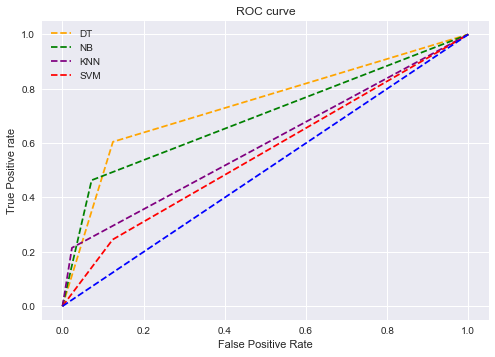

In [14]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='DT')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='NB')
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

It is evident from the plot that the AUC for the Decision Tree (DT) ROC curve is higher than that for the NB, KNN and SVM ROC curve. Therefore, we can say that DT did a better job of classifying the positive class in the dataset.

Hope this will helps you understand better on how to use AUC-ROC curve in evaluating your model. Happy learning :)